# **Abstract**

Un **sistema de recomendación** es una herramienta que establece un conjunto de criterios y valoraciones sobre los datos de los usuarios para realizar predicciones sobre recomendaciones de elementos que puedan ser de utilidad o valor para el usuario. Estos sistemas seleccionan datos proporcionados por el usuario de forma directa o indirecta, y procede a analizar y procesar información del historial del usuario para transformar estos datos en conocimiento de recomendación.

Los sistemas de recomendación en la actualidad tienen un nivel de eficiencia alto ya que pueden asociar elementos de nuestros perfiles de consumo como el historial de compras, selección de contenidos e inclusive nuestras horas de actividad, para realizar las recomendaciones.

Esto permite que descubramos elementos nuevos con mayor porcentaje de cercanía a nuestros gustos, preferencias, necesidades.

El funcionamiento de los sistemas de recomendación ha evolucionado gracias al Machine Learning. Anteriormente los motores de búsqueda, plataformas de contenido y ventas de producto funcionaban con rankings o listas de popularidad. Estos sistemas eran funcionales hasta cierto punto, pero no podían personalizar la experiencia del usuario y mostraban elementos que no se correspondían a nuestros intereses.

**Tipos de sistemas de recomendación:**

Existen varios tipos de sistemas de recomendación. Estos dependen de variables principales que son las que condicionan su funcionamiento. A continuación descubriremos los principales sistemas implementados y algunas de sus características.

**Sistemas de popularidad**

Los sistemas basados en la popularidad son implementados principalmente en las ventas de productos o sugerencias concretas. Estos toman como referencia la popularidad del objeto de estudio por una variable principal que puede ser el número de ventas, una característica especial o inclusive una oferta y se muestra de forma general a todos los usuarios que investiguen el área a la que pertenece el objeto. Estos sistemas suelen ser fáciles de implementar y gozan de cierto nivel de efectividad. Su desventaja principal es la imposibilidad de personalizar los criterios de sugerencia para el usuario.

**Sistemas de contenido**

Los sistemas de recomendación basados en contenido son aquellos que tomando en cuenta algunos datos del historial del usuario intenta predecir que busca el usuario y que sugerencias similares puede mostrar. Este tipo de sistemas es uno de los que tiene mayor presencia en la actualidad. Con ellos podemos descubrir opciones que se ajusten a las características de los productos o contenidos que hemos disfrutado con anterioridad y elegir elementos similares nuevos.

**Sistemas colaborativos**

Este tipo de sistema es muy novedoso ya que genera recomendaciones analizando datos, identificando perfiles y haciendo contraste entre la información del perfil del usuario y la de un colectivo de usuarios. Esto permite al modelo aprender a agrupar perfiles similares y aprender de los datos que recibe de forma general, para desarrollar recomendaciones individuales.

**Filtrado colaborativo**

Uno de los elementos más innovadores y que ayuda a optimizar los procesos de recomendación es el filtrado colaborativo. Esto es una técnica que permite solventar los problemas de sobre información que pueden sufrir los usuarios de plataformas tecnológicas. La interacción de los usuarios y los datos que son generados por ellos ayudan a crear una especie de inteligencia colectiva que ayuda a incrementar la calidad de las recomendaciones, dejando de lado elementos irrelevantes dentro de los conjuntos de datos.

Para concluir, amazon posee la informacion necesaria para crear un sistema de recomendacion y al tener tanto impacto en los negocios digitales de la actualidad, tengo como objetivo crear un prototipo para evaluar su integracion con el negocio. Ademas, no se pierde nada desarrollandolo

**¿Que tipo de sistema se va a implementar?**

Los tipos de sistemas parecen ser similares entre si, pero, necesito conocer las posibles soluciones que se adaptan con la informacion disponible.

**Sistemas de popularidad:**
Se podria implementar pero tiene una desventaja, no es capaz de predecir recomendaciones para la minoria que no les gusta las tendencias

**Sistemas de contenido:**
Necesito los atributos de items, los cuales tengo a disposicion y tambien la relacion de usuarios - items con su respectivo "rating". Por lo tanto es viable y voy a experimentar con este tipo

**Sistemas colaborativos:**
No se puede implementar porque necesito informacion de los usuarios y los productos

**Filtrado colaborativo:**
Es posible de implementar porque no hace falta demasiada informacion, solamente el id item, id usuario y el rating. Tambien tiene ventajas que cumplen con el objetivo:

1) Puede ayudar a los usuarios a descubrir nuevos intereses. De forma aislada, es posible que el sistema no sepa que el usuario está interesado en un elemento determinado, pero el modelo aún puede recomendarlo.

2) Hasta cierto punto, el sistema solo necesita la matriz de retroalimentación para entrenar un modelo de factorización matricial. En particular, el sistema no necesita funciones contextuales.

En resumen, el sistema tendra 2 prototipos (Sistemas de contenido y Filtrado colaborativo), al final decidire cual es mas conveniente de utilizar.

# **Exploratory data analysis (EDA)**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
ruta_train = "/content/drive/MyDrive/datathon_2021_sr/train.csv"
ruta_metadata = "/content/drive/MyDrive/datathon_2021_sr/metadata.csv"

Cargo el dataset de entrenamiento

In [ ]:
df_train = pd.read_csv(ruta_train)
columnas_necesarias = ["account_id","asset_id","tunein","tuneout"]
#df_train = df_train[columnas_necesarias]
df_train.head()

,customer_id,account_id,device_type,asset_id,tunein,tuneout,resume
0,0,90627,STATIONARY,18332.0,2021-02-18 22:52:00.0,2021-02-18 23:35:00.0,0
1,0,90627,STATIONARY,24727.0,2021-03-24 23:17:00.0,2021-03-25 00:01:00.0,0
2,1,3387,STB,895.0,2021-03-15 10:05:00.0,2021-03-15 10:23:00.0,0
3,1,3387,STB,895.0,2021-03-15 10:23:00.0,2021-03-15 11:18:00.0,1
4,1,3387,STB,26062.0,2021-03-16 09:24:00.0,2021-03-16 09:44:00.0,0


Hay 113881 cuentas de usuarios

In [ ]:
df_train["account_id"].nunique()

113881

Conviene ordernar de menor a mayor para que sea mas legible

In [ ]:
df_train.sort_values(by=['account_id','asset_id'],ascending=True,inplace=True)
df_train.head()

,customer_id,account_id,device_type,asset_id,tunein,tuneout,resume
3164588,94636,0,CLOUD_CLIENT,6397.0,2021-02-25 21:05:00.0,2021-02-25 21:53:00.0,0
3164585,94636,0,STB,13056.0,2021-01-13 00:12:00.0,2021-01-13 01:17:00.0,1
3164587,94636,0,STB,15900.0,2021-01-18 15:21:00.0,2021-01-18 17:29:00.0,0
3164584,94636,0,STB,29811.0,2021-01-12 21:13:00.0,2021-01-12 22:32:00.0,0
3164586,94636,0,STB,29897.0,2021-01-17 01:45:00.0,2021-01-17 02:01:00.0,1


In [ ]:
df_train["account_id"].nunique()

113881

In [ ]:
df_train.shape

(3657801, 7)

In [ ]:
print(f'Nº de filas: {df_train.shape[0]}')
print(f'Nº de columnas: {df_train.shape[1]}')
columnas = df_train.columns
print('Nombre de las columnas: ')
for col in columnas:
    print(col)

Nº de filas: 3657801
Nº de columnas: 7
Nombre de las columnas: 
customer_id
account_id
device_type
asset_id
tunein
tuneout
resume


**Valores faltantes:**

A continuacion, voy a imputar los datos

In [ ]:
print(df_train.isnull().sum())

customer_id     0
account_id      0
device_type    29
asset_id       22
tunein          0
tuneout         0
resume          0
dtype: int64


In [ ]:
df_train.dtypes

customer_id      int64
account_id       int64
device_type     object
asset_id       float64
tunein          object
tuneout         object
resume           int64
dtype: object

Device type puede ser imputado por la moda, es MUY probable que los faltantes sean STB

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


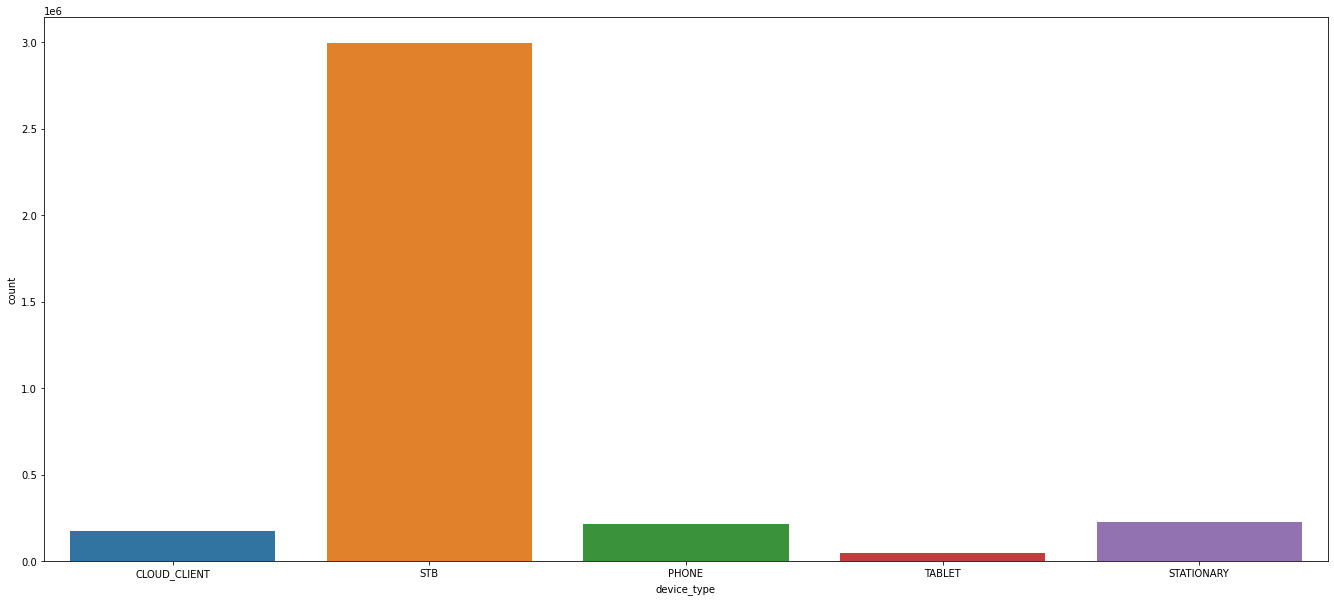

In [ ]:
plt.figure(figsize=(23,10))
sns.countplot(df_train["device_type"])
plt.show()

In [ ]:
def imputar_faltantes_por_moda(dataset, columna):
  moda = dataset[columna].value_counts().index[0]
  dataset[columna] = dataset[columna].fillna(moda)

In [ ]:
imputar_faltantes_por_moda(df_train, "device_type")

In [ ]:
print(df_train.isnull().sum())

customer_id     0
account_id      0
device_type     0
asset_id       22
tunein          0
tuneout         0
resume          0
dtype: int64


No tengo forma de reemplazar los assets id a partir de un patron, pero tampoco puedo eliminar las filas con los datos faltantes.
Voy a reemplazar por moda

In [ ]:
imputar_faltantes_por_moda(df_train, "asset_id")
print(df_train.isnull().sum())

customer_id    0
account_id     0
device_type    0
asset_id       0
tunein         0
tuneout        0
resume         0
dtype: int64


Voy a convertir las fechas string a tipo datetime para poder medir la diferencia

In [ ]:
df_train['tunein_datetime'] = pd.to_datetime(df_train['tunein'], format='%Y-%m-%d %H:%M:%S')
df_train['tunein_datetime'].head()

3164588   2021-02-25 21:05:00
3164585   2021-01-13 00:12:00
3164587   2021-01-18 15:21:00
3164584   2021-01-12 21:13:00
3164586   2021-01-17 01:45:00
Name: tunein_datetime, dtype: datetime64[ns]

In [ ]:
df_train['tuneout_datetime'] = pd.to_datetime(df_train['tuneout'], format='%Y-%m-%d %H:%M:%S')
df_train['tuneout_datetime'].head()

3164588   2021-02-25 21:53:00
3164585   2021-01-13 01:17:00
3164587   2021-01-18 17:29:00
3164584   2021-01-12 22:32:00
3164586   2021-01-17 02:01:00
Name: tuneout_datetime, dtype: datetime64[ns]

Diferencia entre tuneout y tunein, para conocer el tiempo invertido en la visualizacion

In [ ]:
df_train['difftune_datetime'] = df_train['tuneout_datetime'] - df_train['tunein_datetime']
df_train['difftune_datetime'].head()

3164588   0 days 00:48:00
3164585   0 days 01:05:00
3164587   0 days 02:08:00
3164584   0 days 01:19:00
3164586   0 days 00:16:00
Name: difftune_datetime, dtype: timedelta64[ns]

In [ ]:
def datetime_to_minutes(x):
  return x.total_seconds()/60

Conversion a minutos

In [ ]:
df_train['minutes'] = df_train['difftune_datetime'].apply(datetime_to_minutes)
df_train['minutes'].head()

3164588     48.0
3164585     65.0
3164587    128.0
3164584     79.0
3164586     16.0
Name: minutes, dtype: float64

Redefino las columnas mas importantes

In [ ]:
columnas_necesarias = ["account_id","asset_id","minutes"]
df_train = df_train[columnas_necesarias]
df_train.head()

,account_id,asset_id,minutes
3164588,0,6397.0,48.0
3164585,0,13056.0,65.0
3164587,0,15900.0,128.0
3164584,0,29811.0,79.0
3164586,0,29897.0,16.0


In [ ]:
df_train["account_id"].nunique()

113881

En caso de haber filas repetidas con el misma account_id y asset_id debido a una irrelevancia con respecto a las columnas eliminadas previamente.
Necesito agrupar por account_id y asset_id, luego sumar los minutos dependiendo del grupo

In [ ]:
df_train = df_train.groupby(['account_id','asset_id'], as_index=False).agg({"minutes": "sum"})
print("Tamaño de df_train: "+str(df_train.shape[0]))

Tamaño de df_train: 2589766


In [ ]:
df_train["account_id"].nunique()

113881

# **Metadata**

In [ ]:
df_metadata = pd.read_csv(ruta_metadata, sep=';')
df_metadata.head()

,asset_id,content_id,title,reduced_title,episode_title,show_type,released_year,country_of_origin,category,keywords,description,reduced_desc,cast_first_name,credits_first_name,run_time_min,audience,made_for_tv,close_caption,sex_rating,violence_rating,language_rating,dialog_rating,fv_rating,pay_per_view,pack_premium_1,pack_premium_2,create_date,modify_date,start_vod_date,end_vod_date
0,15188,0.0,Ep:17 Tiempos Compulsivos,Tiempos_Compul_E17,Episodio 17,Serie,2012.0,AR,Drama,"Trastornos,Médicos,Tragicómica,Telenovela,Enfe...",Esteban recibe una noticia inesperada: va a se...,Esteban recibe una noticia inesperada: va a se...,"Rodrigo De la Serna, Paola Krum, Fernán Mirás,...",Daniel Barone,48.0,General,N,N,N,N,N,N,N,N,N,N,2017-12-01T10:18:15.0Z,2019-01-26T06:37:18.0Z,2017-12-01T00:00:00.0Z,2020-12-01T23:59:59.0Z
1,24940,1.0,7 Cajas,7_Cajas,NaN,Película,2012.0,PY,Suspenso/Acción,"Latinoamérica,Pobreza,Crimen,Pandillas",Víctor trabaja como carretillero. Un día recib...,"Trabajando como carretillero, Víctor recibe un...","Celso Franco, Víctor Sosa, Lali Gonzalez",Juan Carlos Maneglia,105.0,General,N,N,N,N,N,N,N,Y,N,N,2017-12-19T20:58:15.0Z,2019-09-17T19:02:03.0Z,2017-12-15T00:00:00.0Z,2022-12-14T23:59:59.0Z
2,21939,2.0,La Maldición de las Hormigas Gigantes,La_Maldicion_de_las,NaN,Película,2016.0,FI,Terror/Comedia,"Criaturas,Plagas,Adolescentes,Fantasía,Video J...",Un grupo de motociclistas busca diversión el d...,Un grupo de motociclistas descubre un laborato...,"Mark Arnold, Harry Lister Smith, Vanessa Grass...",Marko Mäkilaakso,82.0,Juvenil,Y,N,N,N,N,N,N,N,N,N,2018-02-16T13:51:07.0Z,2020-04-28T14:16:38.0Z,2018-01-25T00:00:00.0Z,2020-12-01T23:59:59.0Z
3,9005,3.0,Una Mujer Fantástica,Una_Mujer_Fantastic,NaN,Película,2017.0,CL,Drama,"LGBT,Mujeres,Latinoamérica",Marina y Orlando están enamorados y planean un...,Marina y Orlando están enamorados. Pero cuando...,"Daniela Vega, Francisco Reyes, Luis Gnecco, Am...",Sebastián Lelio,99.0,General,N,N,N,N,N,N,N,N,Y,N,2018-05-26T11:58:44.0Z,2019-11-15T03:00:23.0Z,2018-05-27T00:00:00.0Z,2021-04-30T23:59:59.0Z
4,7391,4.0,Star Trek,Star_Trek,NaN,Película,2009.0,US,Ciencia Ficción/Aventura,"Fantasía,Galaxia,Futurismo,Aliens,Criaturas",El descarado James T. Kirk trata de estar a la...,James T. Kirk trata de estar a la altura del l...,"Chris Pine, Zachary Quinto, Leonard Nimoy, Eri...",J.J. Abrams,126.0,General,N,N,N,N,N,N,N,Y,N,N,2019-05-03T20:07:24.0Z,2020-04-09T04:37:29.0Z,2019-05-02T00:00:00.0Z,2020-12-31T23:59:59.0Z


Voy a reemplazar los assets_ids por sus contents_ids correspondientes, para hacer predicciones directas.

In [ ]:
def consultar_contents_ids_con_asset_id(asset_id):
  mask = df_metadata["asset_id"] == asset_id
  contents = df_metadata.loc[mask]["content_id"]
  contents = contents.tolist()
  return contents[0]

In [ ]:
df_train["content_id"] = df_train["asset_id"].apply(consultar_contents_ids_con_asset_id)

In [ ]:
df_train["account_id"].nunique()

113881

Redefino las columnas mas importantes

In [ ]:
columnas_necesarias = ["account_id","content_id","minutes"]
df_train = df_train[columnas_necesarias]
df_train.head()

,account_id,content_id,minutes
0,0,3845.0,48.0
1,0,2866.0,65.0
2,0,1503.0,128.0
3,0,3438.0,79.0
4,0,3498.0,16.0


In [ ]:
df_train["account_id"].nunique()

113881

Agrupo de nuevo, pero esta vez, por account_id y content_id.
Obviamente sumando los miuntos

In [ ]:
df_train = df_train.groupby(['account_id','content_id'], as_index=False).agg({"minutes": "sum"})
print("Tamaño de df_train: "+str(df_train.shape[0]))
df_train["account_id"].nunique()

Tamaño de df_train: 971491


113877

Distribucion de minutos

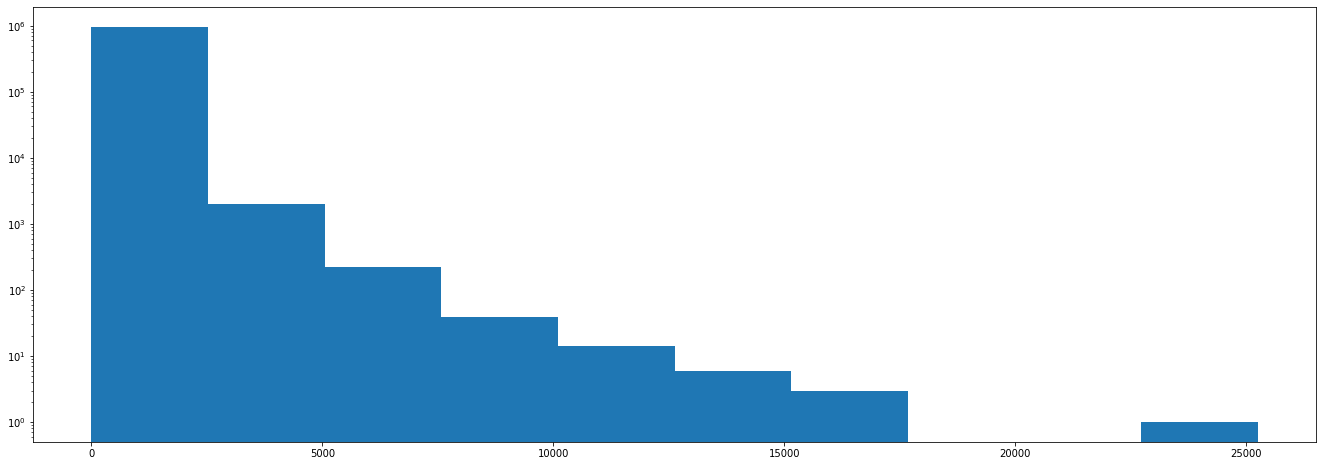

In [ ]:
plt.figure(figsize=(23,8))
plt.hist(df_train['minutes'],log=True)
plt.show()

In [ ]:
df_train.head()

,account_id,content_id,minutes
0,0,1503.0,128.0
1,0,2866.0,65.0
2,0,3438.0,79.0
3,0,3498.0,16.0
4,0,3845.0,48.0


Voy a escalar la columna "minutes" para tratarla como un "rating" a predecir

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
df_train['rating'] = MinMaxScaler(feature_range=(1,5)).fit_transform(df_train["minutes"].values.reshape(-1,1))

Aun que.....hay un problema.

Hay una GRAN concentracion en el intervalo [1,1.5], lo mas probable es que la matriz de utilidad prediga una recomendacion entre [1,1.5] para todos los casos.

Es mas, tal vez no pueda devolver valores flotantes sino enteros porque la diferencia es muy corta.

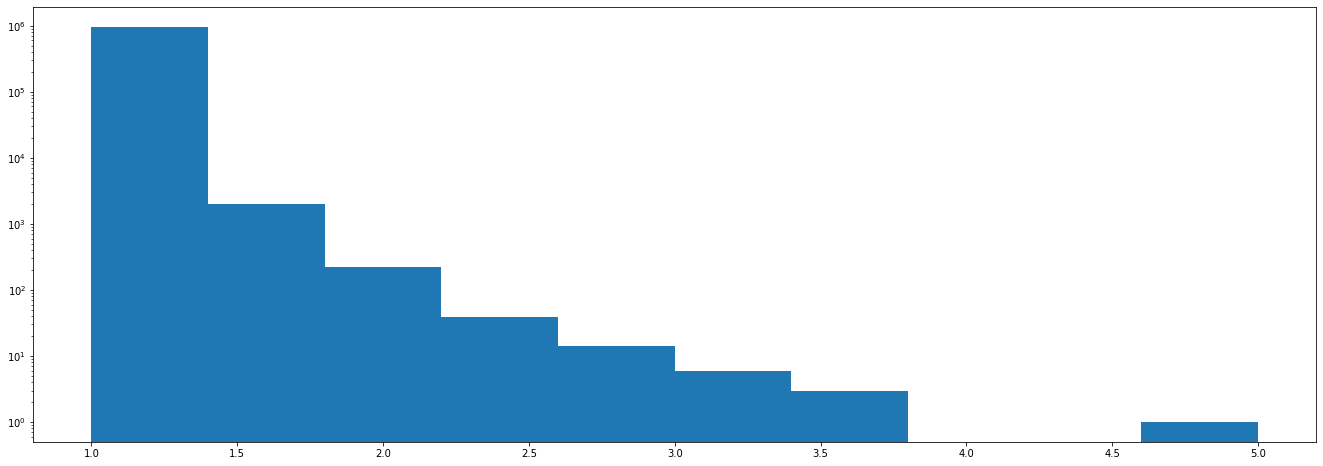

In [ ]:
plt.figure(figsize=(23,8))
plt.hist(df_train['rating'],log=True)
plt.show()

Esta repleta de valores atipicos, y tambien es una ley de potencia

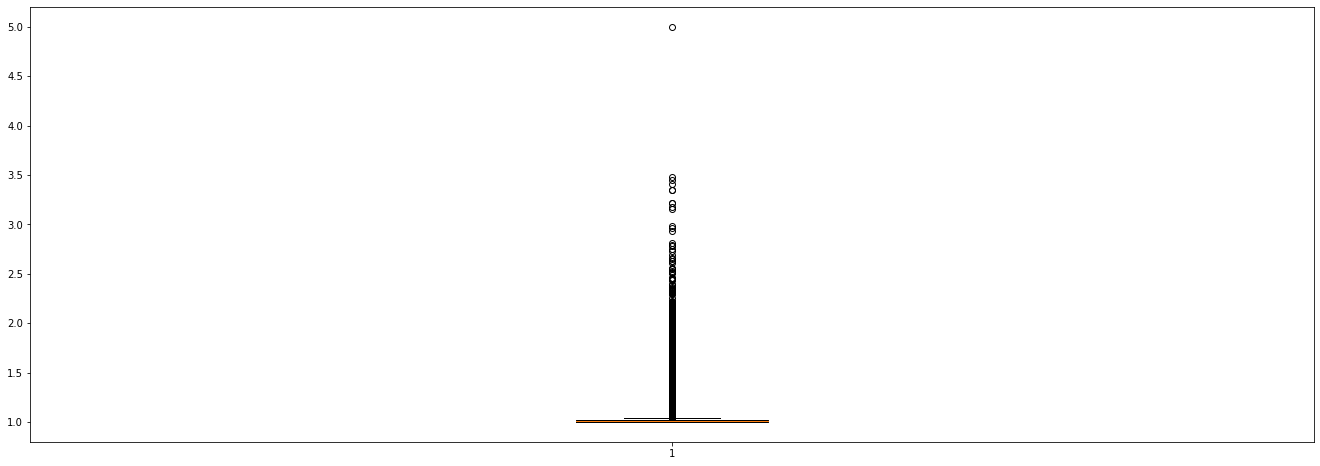

In [ ]:
plt.figure(figsize=(23,8))
plt.boxplot(df_train['rating'])
plt.show()

Hay una herramienta para normalizar una ley de potencia, el "PowerTransformer" se encarga precisamente de eso

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer

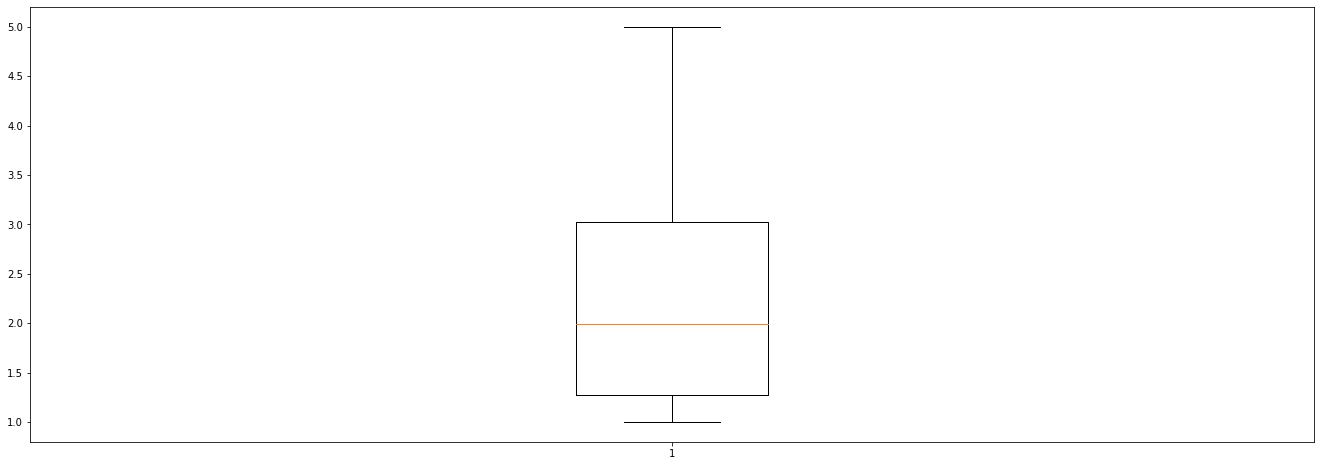

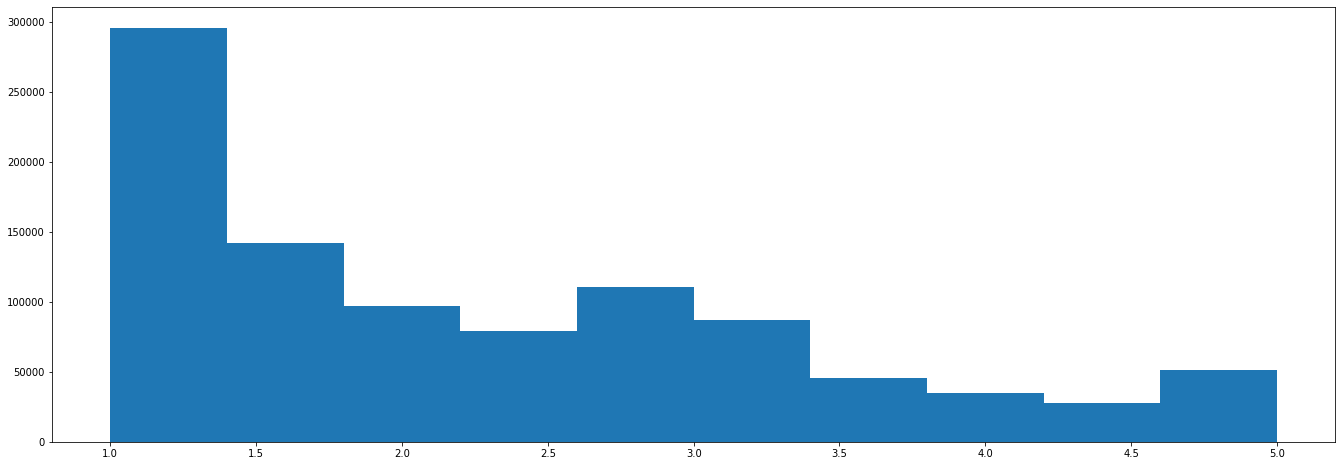

In [ ]:
c = df_train["rating"].copy()

min = c.min()
max = c.max()

c = np.array(c).reshape(-1,1)

c = MinMaxScaler(feature_range=(1,2)).fit_transform(c)

c = PowerTransformer(method='box-cox', standardize=True).fit_transform(c)

c = MinMaxScaler(feature_range=(min,max)).fit_transform(c)

c = np.float32(c)

plt.figure(figsize=(23,8))
plt.boxplot(c)
plt.show()
plt.figure(figsize=(23,8))
plt.hist(c)
plt.show()
df_train["rating_transformado"] = c

In [ ]:
df_train.head()

,account_id,content_id,minutes,rating,rating_transformado
0,0,1503.0,128.0,1.019960,3.369186
1,0,2866.0,65.0,1.009980,2.447359
2,0,3438.0,79.0,1.012198,2.689496
3,0,3498.0,16.0,1.002218,1.380330
4,0,3845.0,48.0,1.007287,2.118757


In [ ]:
df_train["account_id"].nunique()

113881

In [ ]:
df_train.to_csv("df_train.csv", index=False)

In [ ]:
!cp "df_train.csv" "/content/drive/MyDrive/datathon_2021_sr/df_train.csv"

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
df_train = pd.read_csv("/content/drive/MyDrive/datathon_2021_sr/df_train.csv")
df_train = df_train[["account_id","content_id","rating_transformado"]]
df_train.head()

,account_id,content_id,rating_transformado
0,0,1503.0,3.369277
1,0,2866.0,2.447430
2,0,3438.0,2.689575
3,0,3498.0,1.380352
4,0,3845.0,2.118816


In [ ]:
df_train["account_id"].nunique()

113881

## **Matrix factorization**

El primer prototipo es un algoritmo SVD basado en factorizacion de matrices.

**SVD (Singular Value Decomposition)**

Utiliza una estructura matricial en la que cada fila representa a un usuario y cada columna representa un elemento. Los elementos de esta matriz son las calificaciones que los usuarios otorgan a los elementos.

La factorización de esta matriz se realiza mediante la descomposición de valores singulares. Encuentra factores de matrices a partir de la factorización de una matriz de alto nivel (usuario-elemento-calificación). La descomposición de valor singular es un método para descomponer una matriz en otras tres matrices como se indica a continuación: 

$$
A = U*S*V^T
$$

Donde A es una matriz de utilidad mx n , U es una matriz singular izquierda ortogonal mx r , que representa la relación entre usuarios y factores latentes, S es una matriz diagonal rx r , que describe la fuerza de cada factor latente y V es un rx n matriz singular diagonal derecha, que indica la similitud entre ítems y factores latentes. Los factores latentes aquí son las características de los elementos

En mi caso, voy a usar el algoritmo proveniente de la libreria "surprise", donde las predicciones tienen la siguiente forma:

$$
p = b_{ui} + q_i^T*p_u
$$

donde:
$$
b_{ui} = μ + b_u + b_i
$$

y la formula se traduce a 
$$
r_{ui} = μ + b_u + b_i + q_i^T*p_u
$$

La anterior formula esta basada en el modelo de matriz de factorizacion:
Los modelos MF mapean usuarios e items
a un espacio de factores latentes, de dimensionalidad f, tal que
Las interacciones usuario-elemento se modelan como productos internos en
ese espacio. Por lo tanto, cada elemento i está asociado con un vector q_i y cada usuario u está asociado con un vector q_u

Para cada item i, los elementos de q_i miden el alcance del articulo para todos los factores correspondientes a los items, y obviamente los elementos de q_i seran 0 o 1.

Para cada usuario u, los elementos de p_u miden el alcance del usuario para todos los factores correspondientes a los usuarios, y obviamente los elementos de p_u seran 0 o 1.

Por ultimo, se calcula el producto escalar

$$
q_i^T*p_u
$$

lo que captura la interaccion del usuario con los items, y de eso se pueden ordenar las estimaciones de mayor a menor para recomendar items al usuario

Sin embargo, en gran parte de las observaciones, hay una gran variacion en los ratings y esto se debe a los efectos asociados con usuarios o items, conocidos como sesgos o intercepciones, independientemente de cualquier interacción. Por ejemplo, el filtro colaborativo exhibe grandes tendencias sistemáticas para algunos usuarios que dan ratings mal altos que otros, y para algunos items
para recibir ratings mas altos que otros. Después de todo, algunos items
son ampliamente percibidos como mejores (o peores) que otros

Por lo tanto, no sería apropiado predecir los ratings por una interacción de la forma:

$$
q_i^T*p_u
$$

El sistema debe intentar identificar la parte de estos valores que el usuario individual o los sesgos de los items pueden explicar, sometiendo solo la verdadera parte de interacción de los datos para factorizar el modelado. Una aproximación de primer orden del sesgo involucrado en la estimacion es la siguiente:

$$
b_{ui} = μ + b_u + b_i
$$

donde μ es el promedio general de los ratings, b_u y b_i son las desviaciones de los usuarios e items, respectivamente, del promedio

La funcion de perdida a minimizar es la siguiente:

$$
\sum_{r_{ui}}^{n} ((r_{ui} - \bar{r_{ui}})^{2} + λ(b_i^{2}+b_u^{2}+||q_i||^{2}+||p_u||^{2}))
$$

La minimización se realiza mediante un descenso de gradiente estocástico muy sencillo:

$$
b_u <=  b_u + γ(e_{ui} - λb_u)
$$

$$
b_i <=  b_i + γ(e_{ui} - λb_i)
$$

$$
p_u <=  p_u + γ(e_{ui}*q_i - λp_u)
$$

$$
q_i <=  q_i + γ(e_{ui}*p_u - λq_i)
$$

donde:

$$
e_{ui}=r_{ui} − \bar{r_{ui}}
$$

Estos pasos se realizan en todos los ratings del conjunto de entrenamiento y en una n cantidad de epocas. Las líneas de base se inicializan en 0. Los factores de usuario y de elemento se inicializan aleatoriamente de acuerdo con una distribución normal, que se puede ajustar mediante los parámetros init_mean y init_std_dev.

Tambien puedo definir la tasa de aprendizaje γ y el plazo de regularización λ. Ambos pueden ser diferentes para cada tipo de parámetro. De forma predeterminada, las tasas de aprendizaje se establecen en 0.005 y los términos de regularización se establecen en 0.02.

**Surprise**

In [ ]:
!pip install surprise

In [ ]:
from surprise import Reader, Dataset, KNNBasic, SVD, NMF
from surprise.model_selection import GridSearchCV, cross_validate
from surprise.accuracy import rmse

In [ ]:
columnas = ["account_id","content_id","rating_transformado"]

In [ ]:
reader = Reader(rating_scale=(1.0, 5.0))

data = Dataset.load_from_df( df_train[columnas], reader = reader )

In [ ]:
#algo = NMF()
#cross_validate(data=data, algo=algo, measures=['RMSE'], cv=5, verbose=True)

Evaluating RMSE of algorithm NMF on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.1040  1.1073  1.1045  1.1019  1.1062  1.1048  0.0019  
Fit time          76.54   75.77   76.99   75.59   76.08   76.20   0.51    
Test time         2.00    2.83    3.02    3.11    2.95    2.78    0.40    


{'fit_time': (76.542804479599,
  75.77365636825562,
  76.98866939544678,
  75.59339046478271,
  76.07928776741028),
 'test_rmse': array([1.10400236, 1.10733661, 1.10453314, 1.10192061, 1.10621122]),
 'test_time': (2.0011894702911377,
  2.828463077545166,
  3.023160457611084,
  3.1140458583831787,
  2.9537880420684814)}

Evaluating RMSE of algorithm NMF on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std  

RMSE (testset)    1.1040  1.1073  1.1045  1.1019  1.1062  1.1048  0.0019  
Fit time          76.54   75.77   76.99   75.59   76.08   76.20   0.51    
Test time         2.00    2.83    3.02    3.11    2.95    2.78    0.40


{'fit_time': (76.542804479599,
  75.77365636825562,
  76.98866939544678,
  75.59339046478271,
  76.07928776741028),
 'test_rmse': array([1.10400236, 1.10733661, 1.10453314, 1.10192061, 1.10621122]),
 'test_time': (2.0011894702911377,
  2.828463077545166,
  3.023160457611084,
  3.1140458583831787,
  2.9537880420684814)}

In [ ]:
#param_grid = {'n_factors' : [50, 75], 'lr_all' : [0.5, 0.05], 'reg_all' : [0.06, 0.04]}
#
#gs = GridSearchCV(algo_class=SVD, measures=['RMSE'], param_grid=param_grid)
#gs.fit(data)
#
#print('\n###############')
## Best RMSE score
#print('Mejor score :', gs.best_score['rmse'])
#
## Combination of parameters that gave the best RMSE score
#print('Mejores parametros :', gs.best_params['rmse'])
#print('###############')


###############
Mejor score : 1.0254589085059953
Mejores parametros : {'n_factors': 75, 'lr_all': 0.05, 'reg_all': 0.06}
###############


###############

Mejor score : 1.0254589085059953

Mejores parametros : {'n_factors': 75, 'lr_all': 0.05, 'reg_all': 0.06}

###############

Parece que el error no bajara de 1, no es una solucion contundente y ademas no es robusta para los nuevos items o usuarios.

Vamos a probar con el sistema basado en contenido.......

# **Content-Based System Recommender**

Necesito definir las variables que seran de utilidad para el sistema, y luego codificarlas

In [ ]:
df_metadata.head()

,asset_id,content_id,title,reduced_title,episode_title,show_type,released_year,country_of_origin,category,keywords,description,reduced_desc,cast_first_name,credits_first_name,run_time_min,audience,made_for_tv,close_caption,sex_rating,violence_rating,language_rating,dialog_rating,fv_rating,pay_per_view,pack_premium_1,pack_premium_2,create_date,modify_date,start_vod_date,end_vod_date
0,15188,0.0,Ep:17 Tiempos Compulsivos,Tiempos_Compul_E17,Episodio 17,Serie,2012.0,AR,Drama,"Trastornos,Médicos,Tragicómica,Telenovela,Enfe...",Esteban recibe una noticia inesperada: va a se...,Esteban recibe una noticia inesperada: va a se...,"Rodrigo De la Serna, Paola Krum, Fernán Mirás,...",Daniel Barone,48.0,General,N,N,N,N,N,N,N,N,N,N,2017-12-01T10:18:15.0Z,2019-01-26T06:37:18.0Z,2017-12-01T00:00:00.0Z,2020-12-01T23:59:59.0Z
1,24940,1.0,7 Cajas,7_Cajas,NaN,Película,2012.0,PY,Suspenso/Acción,"Latinoamérica,Pobreza,Crimen,Pandillas",Víctor trabaja como carretillero. Un día recib...,"Trabajando como carretillero, Víctor recibe un...","Celso Franco, Víctor Sosa, Lali Gonzalez",Juan Carlos Maneglia,105.0,General,N,N,N,N,N,N,N,Y,N,N,2017-12-19T20:58:15.0Z,2019-09-17T19:02:03.0Z,2017-12-15T00:00:00.0Z,2022-12-14T23:59:59.0Z
2,21939,2.0,La Maldición de las Hormigas Gigantes,La_Maldicion_de_las,NaN,Película,2016.0,FI,Terror/Comedia,"Criaturas,Plagas,Adolescentes,Fantasía,Video J...",Un grupo de motociclistas busca diversión el d...,Un grupo de motociclistas descubre un laborato...,"Mark Arnold, Harry Lister Smith, Vanessa Grass...",Marko Mäkilaakso,82.0,Juvenil,Y,N,N,N,N,N,N,N,N,N,2018-02-16T13:51:07.0Z,2020-04-28T14:16:38.0Z,2018-01-25T00:00:00.0Z,2020-12-01T23:59:59.0Z
3,9005,3.0,Una Mujer Fantástica,Una_Mujer_Fantastic,NaN,Película,2017.0,CL,Drama,"LGBT,Mujeres,Latinoamérica",Marina y Orlando están enamorados y planean un...,Marina y Orlando están enamorados. Pero cuando...,"Daniela Vega, Francisco Reyes, Luis Gnecco, Am...",Sebastián Lelio,99.0,General,N,N,N,N,N,N,N,N,Y,N,2018-05-26T11:58:44.0Z,2019-11-15T03:00:23.0Z,2018-05-27T00:00:00.0Z,2021-04-30T23:59:59.0Z
4,7391,4.0,Star Trek,Star_Trek,NaN,Película,2009.0,US,Ciencia Ficción/Aventura,"Fantasía,Galaxia,Futurismo,Aliens,Criaturas",El descarado James T. Kirk trata de estar a la...,James T. Kirk trata de estar a la altura del l...,"Chris Pine, Zachary Quinto, Leonard Nimoy, Eri...",J.J. Abrams,126.0,General,N,N,N,N,N,N,N,Y,N,N,2019-05-03T20:07:24.0Z,2020-04-09T04:37:29.0Z,2019-05-02T00:00:00.0Z,2020-12-31T23:59:59.0Z


**Valores faltantes**

In [ ]:
df_metadata.isnull().sum()

asset_id                  0
content_id               21
title                     0
reduced_title             0
episode_title          4147
show_type                 4
released_year             0
country_of_origin         4
category                  0
keywords                  2
description               2
reduced_desc              0
cast_first_name        8732
credits_first_name    12554
run_time_min              0
audience                  1
made_for_tv               0
close_caption             0
sex_rating                0
violence_rating           0
language_rating           0
dialog_rating             0
fv_rating                 0
pay_per_view              0
pack_premium_1            0
pack_premium_2            0
create_date               0
modify_date               0
start_vod_date            0
end_vod_date              0
dtype: int64

Estas son las columnas que puedo descartar porque contienen faltantes y no aportan informacion relevante.

"episode_title", "description", "cast_first_name", "credits_first_name"

In [ ]:
df_metadata.drop(columns=["episode_title", "description", "cast_first_name", "credits_first_name"], inplace=True)

En el caso de variables categoricas, puedo imputarlas por la moda

In [ ]:
imputar_faltantes_por_moda(df_metadata,"content_id")
imputar_faltantes_por_moda(df_metadata,"show_type")
imputar_faltantes_por_moda(df_metadata,"country_of_origin")
imputar_faltantes_por_moda(df_metadata,"audience")
df_metadata["keywords"].fillna('', inplace=True)

El dataset quedo limpio....

In [ ]:
df_metadata.isnull().sum()

asset_id             0
content_id           0
title                0
reduced_title        0
show_type            0
released_year        0
country_of_origin    0
category             0
keywords             0
reduced_desc         0
run_time_min         0
audience             0
made_for_tv          0
close_caption        0
sex_rating           0
violence_rating      0
language_rating      0
dialog_rating        0
fv_rating            0
pay_per_view         0
pack_premium_1       0
pack_premium_2       0
create_date          0
modify_date          0
start_vod_date       0
end_vod_date         0
dtype: int64

In [ ]:
df_metadata.shape

(33144, 26)

Atributos importantes para el sistema basado en contenido:

"show_type", "category", "audience"

In [ ]:
df_metadata[["show_type", "category", "audience"]].head()

,show_type,category,audience
0,Serie,Drama,General
1,Película,Suspenso/Acción,General
2,Película,Terror/Comedia,Juvenil
3,Película,Drama,General
4,Película,Ciencia Ficción/Aventura,General


Show type codificado

In [ ]:
df_show_type = df_metadata["show_type"].copy()
df_show_type = pd.DataFrame(df_show_type, columns=["show_type"])
df_show_type = pd.get_dummies(df_metadata["show_type"], prefix='show_type_')
df_show_type.head()

,show_type__Gaming,show_type__Película,show_type__Rolling,show_type__Serie,"show_type__Series,Serie",show_type__TV,show_type__Tutorial,show_type__Web
0,0,0,0,1,0,0,0,0
1,0,1,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0


Audience codificado

In [ ]:
df_audience = df_metadata["audience"].copy()
df_audience = pd.DataFrame(df_audience, columns=["audience"])
df_audience = pd.get_dummies(df_metadata["audience"], prefix='aud_')
df_audience.head()

,aud__Familiar,aud__Gaming,aud__General,aud__Hombres,aud__Juvenil,aud__Mujeres,aud__NIños,aud__Niños,aud__Preescolar,aud__Teens
0,0,0,1,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0


Concatenacion de show type y audience

In [ ]:
df_half = pd.concat([df_show_type,df_audience], axis=1)
df_half.head()

,show_type__Gaming,show_type__Película,show_type__Rolling,show_type__Serie,"show_type__Series,Serie",show_type__TV,show_type__Tutorial,show_type__Web,aud__Familiar,aud__Gaming,aud__General,aud__Hombres,aud__Juvenil,aud__Mujeres,aud__NIños,aud__Niños,aud__Preescolar,aud__Teens
0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


Necesito conocer todas las categorias, y codificar los registros como columnas binarias, tal como en los casos anteriores

In [ ]:
categories = set()

In [ ]:
df_metadata['category'].apply(lambda item: [categories.add('cat_'+x) for x in str(item).split('/')])

0              [None]
1        [None, None]
2        [None, None]
3              [None]
4        [None, None]
             ...     
33139    [None, None]
33140    [None, None]
33141    [None, None]
33142    [None, None]
33143    [None, None]
Name: category, Length: 33144, dtype: object

In [ ]:
len(categories)

52

In [ ]:
categories = {x for x in categories if pd.notna(x) or x != ''}
categories.discard('cat_')
categories.discard('nan')
len(categories)

52

Dataframe de categorias codificadas

In [ ]:
categories_df = pd.DataFrame(columns=categories)
categories_df.head()

,cat_Interés General,cat_Religión,cat_Investigación,cat_Dibujos animados,cat_Cultura,"cat_Infantil, Comedia",cat_Naturaleza,cat_Aventuras,cat_Crimen,cat_Policial,cat_Comedia,cat_Animales,cat_Ciencia Ficción,cat_Musical,cat_Romance,cat_Cocina,cat_Western,cat_Moda,cat_Dibujos Animados,cat_Entretenimiento,cat_Fantasía,cat_Humor,cat_Familiar,cat_Viajes,cat_Música,cat_Terror,cat_Aventura,cat_Periodístico,cat_Tutoriales,cat_Entrevistas,cat_Teatro,cat_Accion,cat_Decodificador Flow,cat_Competencia,cat_Historia,cat_Suspenso,cat_Ciencia ficción,cat_Documental,cat_Biografía,cat_Magazine,cat_Deporte,cat_Restauración,cat_Acción,cat_Ciencia,cat_Espectáculo,cat_Animación,cat_Drama,cat_Familia,cat_Bélico,cat_Reality,cat_Político,cat_Infantil


Voy a recorrer la columna "category", crear una lista de valores por cada fila, dentro de esa lista guardare la codificacion de las categorias en la fila particular

In [ ]:
cates  = df_metadata['category']
col_names = categories_df.columns
cat_features = []
for i,cat in enumerate(cates): 
    if pd.notna(cat):
        feats = cat.split('/')                         
        row = np.zeros(len(categories))
        for feat in feats:
            feat = 'cat_'+feat
            if feat != '':
                if feat in col_names:
                  index = np.where(col_names == feat)[0][0] #index            
                  row[index] = 1
        cat_features.append(row)

In [ ]:
categories_df = pd.DataFrame(cat_features,columns= categories)
categories_df.head()

,cat_Interés General,cat_Religión,cat_Investigación,cat_Dibujos animados,cat_Cultura,"cat_Infantil, Comedia",cat_Naturaleza,cat_Aventuras,cat_Crimen,cat_Policial,cat_Comedia,cat_Animales,cat_Ciencia Ficción,cat_Musical,cat_Romance,cat_Cocina,cat_Western,cat_Moda,cat_Dibujos Animados,cat_Entretenimiento,cat_Fantasía,cat_Humor,cat_Familiar,cat_Viajes,cat_Música,cat_Terror,cat_Aventura,cat_Periodístico,cat_Tutoriales,cat_Entrevistas,cat_Teatro,cat_Accion,cat_Decodificador Flow,cat_Competencia,cat_Historia,cat_Suspenso,cat_Ciencia ficción,cat_Documental,cat_Biografía,cat_Magazine,cat_Deporte,cat_Restauración,cat_Acción,cat_Ciencia,cat_Espectáculo,cat_Animación,cat_Drama,cat_Familia,cat_Bélico,cat_Reality,cat_Político,cat_Infantil
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_complete = pd.concat([df_half,categories_df], axis=1)
df_complete.head()

,show_type__Gaming,show_type__Película,show_type__Rolling,show_type__Serie,"show_type__Series,Serie",show_type__TV,show_type__Tutorial,show_type__Web,aud__Familiar,aud__Gaming,aud__General,aud__Hombres,aud__Juvenil,aud__Mujeres,aud__NIños,aud__Niños,aud__Preescolar,aud__Teens,cat_Interés General,cat_Religión,cat_Investigación,cat_Dibujos animados,cat_Cultura,"cat_Infantil, Comedia",cat_Naturaleza,cat_Aventuras,cat_Crimen,cat_Policial,cat_Comedia,cat_Animales,cat_Ciencia Ficción,cat_Musical,cat_Romance,cat_Cocina,cat_Western,cat_Moda,cat_Dibujos Animados,cat_Entretenimiento,cat_Fantasía,cat_Humor,cat_Familiar,cat_Viajes,cat_Música,cat_Terror,cat_Aventura,cat_Periodístico,cat_Tutoriales,cat_Entrevistas,cat_Teatro,cat_Accion,cat_Decodificador Flow,cat_Competencia,cat_Historia,cat_Suspenso,cat_Ciencia ficción,cat_Documental,cat_Biografía,cat_Magazine,cat_Deporte,cat_Restauración,cat_Acción,cat_Ciencia,cat_Espectáculo,cat_Animación,cat_Drama,cat_Familia,cat_Bélico,cat_Reality,cat_Político,cat_Infantil
0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Necesito agregar de nuevo la columna de content_id.

Hay un problema y es que los content_ids estan repetidos en algunas filas, debido a que el dataset contenia asociaciones de contenidos con distintos assets.

Mi solucion para esto es agrupar por content_id y sumar el resto de las columnas, luego imponer un valor maximo (1), esto hara que los contenidos representen de forma general los metadatos de sus assets correspondientes.

In [ ]:
df_complete["content_id"] = df_metadata["content_id"].values
df_complete.head()

,show_type__Gaming,show_type__Película,show_type__Rolling,show_type__Serie,"show_type__Series,Serie",show_type__TV,show_type__Tutorial,show_type__Web,aud__Familiar,aud__Gaming,aud__General,aud__Hombres,aud__Juvenil,aud__Mujeres,aud__NIños,aud__Niños,aud__Preescolar,aud__Teens,cat_Interés General,cat_Religión,cat_Investigación,cat_Dibujos animados,cat_Cultura,"cat_Infantil, Comedia",cat_Naturaleza,cat_Aventuras,cat_Crimen,cat_Policial,cat_Comedia,cat_Animales,cat_Ciencia Ficción,cat_Musical,cat_Romance,cat_Cocina,cat_Western,cat_Moda,cat_Dibujos Animados,cat_Entretenimiento,cat_Fantasía,cat_Humor,cat_Familiar,cat_Viajes,cat_Música,cat_Terror,cat_Aventura,cat_Periodístico,cat_Tutoriales,cat_Entrevistas,cat_Teatro,cat_Accion,cat_Decodificador Flow,cat_Competencia,cat_Historia,cat_Suspenso,cat_Ciencia ficción,cat_Documental,cat_Biografía,cat_Magazine,cat_Deporte,cat_Restauración,cat_Acción,cat_Ciencia,cat_Espectáculo,cat_Animación,cat_Drama,cat_Familia,cat_Bélico,cat_Reality,cat_Político,cat_Infantil,content_id
0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
3,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0
4,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0


In [ ]:
cols_a_sumar = df_complete.drop(columns=['content_id'], inplace=False).columns 

conjunto_cols = {}

for c in cols_a_sumar:
  conjunto_cols[c] = "sum"

Listo, ya estan guardados los contenidos con sus atributos

In [ ]:
df_complete_2 = df_complete.groupby(['content_id'], as_index=False).agg(conjunto_cols)
df_complete_2[cols_a_sumar] = df_complete_2[cols_a_sumar].ge(1).astype(int)
df_complete_2.rename(index=df_complete_2["content_id"])
df_complete_2.drop(columns=["content_id"],inplace=True)
df_complete_2.head()

,show_type__Gaming,show_type__Película,show_type__Rolling,show_type__Serie,"show_type__Series,Serie",show_type__TV,show_type__Tutorial,show_type__Web,aud__Familiar,aud__Gaming,aud__General,aud__Hombres,aud__Juvenil,aud__Mujeres,aud__NIños,aud__Niños,aud__Preescolar,aud__Teens,cat_Interés General,cat_Religión,cat_Investigación,cat_Dibujos animados,cat_Cultura,"cat_Infantil, Comedia",cat_Naturaleza,cat_Aventuras,cat_Crimen,cat_Policial,cat_Comedia,cat_Animales,cat_Ciencia Ficción,cat_Musical,cat_Romance,cat_Cocina,cat_Western,cat_Moda,cat_Dibujos Animados,cat_Entretenimiento,cat_Fantasía,cat_Humor,cat_Familiar,cat_Viajes,cat_Música,cat_Terror,cat_Aventura,cat_Periodístico,cat_Tutoriales,cat_Entrevistas,cat_Teatro,cat_Accion,cat_Decodificador Flow,cat_Competencia,cat_Historia,cat_Suspenso,cat_Ciencia ficción,cat_Documental,cat_Biografía,cat_Magazine,cat_Deporte,cat_Restauración,cat_Acción,cat_Ciencia,cat_Espectáculo,cat_Animación,cat_Drama,cat_Familia,cat_Bélico,cat_Reality,cat_Político,cat_Infantil
0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


El dataset se redujo considerablemente

In [ ]:
df_complete_2.shape

(4366, 70)

# **KNN Content-Based Recommender**

Nearest Neighbours es un modelo de machine learning no supervisado puede determinar asociaciones de 1 elemento con otros k elementos pertenecientes a un mismo conjunto, con la metrica "similitud del coseno", la cual depende del coseno del angulo entre 2 vectores (esos vectores son los atributos codificados de los contenidos).

Cuando el angulo entre los vectores se aproxima a cero, querie decir que los vectores son "similares", si se aproxima a 180, quiere decir que los vectores son opuestos o "no similares"

In [ ]:
from sklearn.neighbors import NearestNeighbors

In [ ]:
knn = NearestNeighbors(n_neighbors=40,metric='cosine')

In [ ]:
knn.fit(df_complete_2)

NearestNeighbors(algorithm='auto', leaf_size=30, metric='cosine',
                 metric_params=None, n_jobs=None, n_neighbors=40, p=2,
                 radius=1.0)

In [ ]:
distances,indecies = knn.kneighbors(df_complete_2)

Funcion para consultar el historial del usuario, naturalmente voy a empezar a predecir con el contenido que tenga mas tiempo "invertido", porque es el que parece mas acuerdo a los gustos del usuario.

In [ ]:
df_train = pd.read_csv("/content/drive/MyDrive/datathon_2021_sr/df_train.csv")
df_train = df_train[["account_id","content_id","minutes"]]
df_train.head()

,account_id,content_id,minutes
0,0,1503.0,128.0
1,0,2866.0,65.0
2,0,3438.0,79.0
3,0,3498.0,16.0
4,0,3845.0,48.0


In [ ]:
def contents_per_account_id(account_id):
  mask = df_train["account_id"] == account_id
  df_ = df_train.loc[mask].copy()
  df_.sort_values(by="minutes",ascending=False, inplace=True)
  contents = df_["content_id"]
  contents = contents.tolist()
  return contents

In [ ]:
def get_recommendation(account_id):
    recommendations_list = []
    #Historial del usuario
    contents = contents_per_account_id(account_id)
    n = 0
    for c in contents:
      if n < 20:
        index = np.where(df_complete_2.index == c)
        a = np.array(index)
        if a.size > 0:
          neighbours =  indecies[index].tolist()[0] #Prediccion de contenidos similaraes                                                         
          neighbours_distances =  distances[index].tolist()[0]
          index_neighbour = 0
          for neighbour in neighbours:
            #Solo puedo predecir hasta 20 contenidos y no pueden ser parte del historial del usuario, ademas, la distancia entre el historial y 
            #las recomendaciones deben ser menor a un umbral para garantizar similitud 
            if (n < 20) and (neighbour not in contents) and (neighbours_distances[index_neighbour] < 0.15):
              recommendations_list.append(int(neighbour))
              n += 1
            index_neighbour += 1
    recommendations_list.sort()
    recommendations = ""
    recommendations += "["
    if len(recommendations_list) > 0:
      for r in recommendations_list:
        recommendations += str(int(r))+","
      recommendations = recommendations[0:-1]
    recommendations += "]"
    return recommendations

In [ ]:
get_recommendation(0)

'[945,1214,1577,1614,2684,2691,2693,2699,2705,2802,2862,2868,3135,3187,3439,3488,3544,3562,3946,4091]'

Dataframe que contiene los distintos accounts_ids

In [ ]:
df_accounts = df_train["account_id"].copy()
df_accounts = pd.DataFrame(df_accounts, columns=["account_id"])
df_accounts.drop_duplicates(inplace=True)
df_accounts.reset_index(drop=True, inplace=True)
df_accounts.head()

,account_id
0,0
1,1
2,2
3,3
4,4


In [ ]:
df_accounts.shape

(113881, 1)

Prediccion de recomendaciones

In [ ]:
df_accounts["reccomendations"] = df_accounts["account_id"].apply(get_recommendation)

In [ ]:
df_accounts.head()

,account_id,reccomendations
0,0,"[945,1214,1577,1614,2684,2691,2693,2699,2705,2..."
1,1,"[75,115,121,284,917,1619,2091,2141,2165,2170,2..."
2,2,"[113,176,290,384,1537,1877,1897,2045,2097,2164..."
3,3,"[98,126,785,853,1376,1513,1656,1657,1658,1659,..."
4,4,"[75,115,121,284,917,1020,1619,2032,2091,2165,2..."


In [ ]:
df_accounts.isnull().sum()

account_id         0
reccomendations    0
dtype: int64

In [ ]:
df_accounts.shape

(113881, 2)

In [ ]:
df_accounts.to_csv("/content/drive/MyDrive/datathon_2021_sr/df_submit.csv",header=None,index=False)